In [2]:
## 모형 불러오기
import trimesh
import numpy as np
model = trimesh.load('./obj/model.stl')

In [249]:
## 표면 위의 점 추출
### sample_surface_even()은 샘플들이 서로 가까이 붙지않도록 배치
samples = trimesh.sample.sample_surface_even(model, 200)
points = samples[0]

In [4]:
# points

In [250]:
from scipy.spatial import cKDTree

normal_vectors = []
tangent_vectors = []

for p1 in points:
    tree = cKDTree(points)
    # index[0]은 point 자기자신
    # d = p1와 가까운 점들과의 거리, index는 p1과 가까운 점들의 인덱스
    distance_from_p1, index = tree.query(p1, k=3)
    p2 = points[index[1]]
    p3 = points[index[2]]
    
    # 법선 벡터 계산
    # 벡터 v1 = p2 - p1, v2 = p3 - p1
    v1 = np.subtract(p2, p1)
    v2 = np.subtract(p3, p1)
    
    # 벡터곱 (크로스 곱)으로 법선 벡터 계산
    normal_vector = np.cross(v1, v2)
    
    # 정규화 (길이 1로 만들기)
    norm = np.linalg.norm(normal_vector)
    if norm != 0:
        normal_vector = normal_vector / norm
    
    normal_vectors.append(normal_vector)
    
    # v1이나 v2를 사용하여 탄젠트 벡터 계산
    # 크로스 곱으로 노멀 벡터와 직교하는 벡터를 탄젠트 벡터로 설정
    tangent_vector = v1
    
    # 탄젠트 벡터 정규화 (길이 1로 만들기)
    tangent_norm = np.linalg.norm(tangent_vector)
    if tangent_norm != 0:
        tangent_vector = tangent_vector / tangent_norm
    
    tangent_vectors.append(tangent_vector)

In [172]:
# normal_vectors
# len(tangent_vectors)

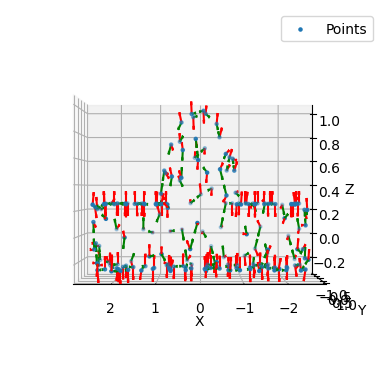

In [251]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(points[:, 0], points[:, 1], points[:, 2], marker='o', s=5, label="Points")

# 법선 벡터 시각화
for i, normal_vector in enumerate(normal_vectors):
    ax.quiver(points[i, 0], points[i, 1], points[i, 2],
              normal_vector[0], normal_vector[1], normal_vector[2], color='red', length=0.1)

# 탄젠트 벡터 시각화
for i, tangent_vector in enumerate(tangent_vectors):
    ax.quiver(points[i, 0], points[i, 1], points[i, 2],
              tangent_vector[0], tangent_vector[1], tangent_vector[2], color='green', length=0.1)

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')  
ax.set_zlabel('Z')
ax.legend()
ax.view_init(elev=0, azim=90)

# 플롯
plt.show()

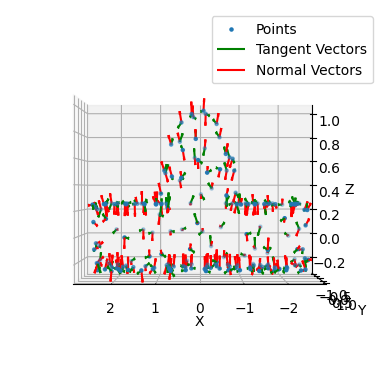

In [252]:
import numpy as np
from scipy.spatial import cKDTree
from sklearn.decomposition import PCA

# 점들과 노멀 벡터를 저장할 리스트
normal_vectors = []
tangent_vectors = []

# KDTree를 사용해 가까운 점들을 찾고, PCA를 통해 평면을 근사
tree = cKDTree(points)

for p1 in points:
    # 가까운 10개의 점을 사용해 국소 평면 근사
    distance_from_p1, index = tree.query(p1, k=10)
    neighbors = points[index]

    # PCA를 사용해 국소 평면의 주 성분 분석
    pca = PCA(n_components=3)
    pca.fit(neighbors)

    # 첫 번째 주성분(주축)이 법선 벡터에 해당 (세 번째 성분은 노멀)
    normal_vector = pca.components_[2]  # PCA 결과에서 세 번째 성분이 법선 벡터

    # 첫 번째와 두 번째 성분이 탄젠트 벡터
    tangent_vector1 = pca.components_[0]
    tangent_vector2 = pca.components_[1]

    normal_vectors.append(normal_vector)
    tangent_vectors.append((tangent_vector1, tangent_vector2))

# 시각화 코드 (이전 코드와 동일)
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(points[:, 0], points[:, 1], points[:, 2], marker='o', s=5, label="Points")

# 탄젠트 벡터 시각화
for i, (tangent_vector1, tangent_vector2) in enumerate(tangent_vectors):
    # 첫 번째 탄젠트 벡터
    ax.quiver(points[i, 0], points[i, 1], points[i, 2],
              tangent_vector1[0], tangent_vector1[1], tangent_vector1[2],
              color='green', length=0.1, label="Tangent Vectors" if i == 0 else "")
    # # 두 번째 탄젠트 벡터
    # ax.quiver(points[i, 0], points[i, 1], points[i, 2],
    #           tangent_vector2[0], tangent_vector2[1], tangent_vector2[2],
    #           color='purple', length=0.1)

# 법선 벡터 시각화 (주석 해제 가능)
for i, normal_vector in enumerate(normal_vectors):
    ax.quiver(points[i, 0], points[i, 1], points[i, 2],
              normal_vector[0], normal_vector[1], normal_vector[2],
              color='red', length=0.1, label="Normal Vectors" if i == 0 else "")

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')  
ax.set_zlabel('Z')
ax.legend()
ax.view_init(elev=0, azim=90)

# 플롯 시각화
plt.show()
